In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix,classification_report


A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. Steps below (refer below
diagram for understanding):

In [ ]:
Data = pd.read_csv("/content/restaurant_reviews_anonymized.csv",encoding="latin1")
classA = Data[Data["Real"]==0]
classB = Data[Data["Real"]==1]

classA_numeric = classA.iloc[:,4:17]
classB_numeric = classB.iloc[:,4:17]

def feature_mean(data):
  return np.mean(data,axis = 0)

def spread_class(data):
  return np.std(data,axis = 0)

def distance_interclass(mean1 , mean2):
  return np.linalg.norm(mean1-mean2)

classA_centroid = feature_mean(classA_numeric)
classB_centroid = feature_mean(classB_numeric)
print("The centroid of class A(Fake reviews) : ",np.array(feature_mean(classA_numeric)))
print("The centroid of class B(Real reviews) : ",np.array(feature_mean(classB_numeric)))
print("The intraclass spread of class A(Fake reviews) : ",np.array(spread_class(classA_numeric)))
print("The intraclass spread of class B(real Reviews) : ",np.array(spread_class(classB_numeric)))
print("the interclass distance between fake and real reviews : ",distance_interclass(classA_centroid, classB_centroid))


The centroid of class A(Fake reviews) :  [ 3.83685651  1.26796925  9.6613621  14.76177434  5.45454545 77.52727273
  8.74545455  6.09090909  0.25454545  0.63040107  0.88562523  8.21100622
  0.76276155]
The centroid of class B(Real reviews) :  [ 3.8781521   1.6520921  10.97941499 14.59558648  6.56363636 93.58181818
  9.          9.54545455  0.10909091  0.72885383  0.9017434   7.28489112
  0.7852815 ]
The intraclass spread of class A(Fake reviews) :  [ 0.26685377  0.2857272   2.87227466  3.39552788  1.9336088  23.0784075
  4.12186269  2.98647087  0.51232737  0.30052264  0.07660491  2.29722554
  0.06154783]
The intraclass spread of class B(real Reviews) :  [ 0.33489991  0.77862383  5.02158047  6.70213339  3.32901097 59.2034062
  7.17318238  6.67646663  0.31175324  0.30788034  0.06780521  4.06564393
  0.09995452]
the interclass distance between fake and real reviews :  16.54631782866717


A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.  

---



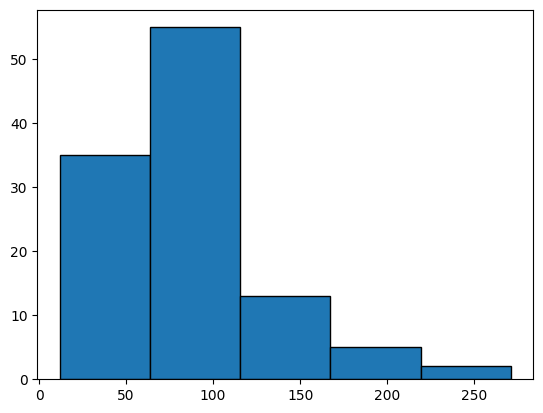

the mean the given feature(F6-Nwo) :  85.55454545454545
the variance of the given feature(F6-NWO) :  2083.2652066115706


In [ ]:
target_feauture = Data["F6-NWO"]

def mean_and_var(feature):
  Mean = np.mean(feature)
  Variance = np.var(feature)
  return Mean,Variance


def plot(Data,Bins):
  plt.hist(Data,bins=Bins,edgecolor="black")
  plt.show()

plot(target_feauture,5)

values = mean_and_var(target_feauture)
print("the mean the given feature(F6-Nwo) : ",values[0])
print("the variance of the given feature(F6-NWO) : ",values[1])

A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph.

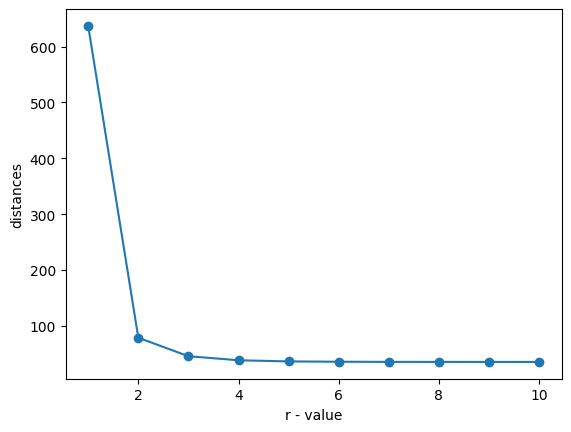

In [ ]:
def Minkwoski(data1 , data2 , order):
  return np.linalg.norm(data1-data2,ord = order)


def plot_observation(data1 , data2):
  distances = [Minkwoski(data1,data2,i) for i in range(1,11)]
  r = list(range(1,11))
  plt.plot(r , distances ,'-o' )
  plt.xlabel("r - value")
  plt.ylabel("distances")
  plt.plot

feature1 =  Data["F3-ANP"]
feature2 = Data["F4-ASL"]

plot_observation(feature1 , feature2)



A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train
test_split() function available in SciKit. See below sample code for help:

In [ ]:
X = Data.iloc[:,4:17]
y = Data["Real"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (77, 13)
x_test  (33, 13)
y_train  (77,)
y_test  (33,)


A5. Train a kNN classifier (k =3) using the training set obtained from above exercise.  


In [ ]:
neigh = knn(n_neighbors=3)
neigh.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

6. Test the accuracy of the kNN using the test set obtained from above exercise.

In [ ]:
accuracy = neigh.score(X_test,y_test)
print("The accuracy of the model is ",accuracy)

The accuracy of the model is  0.696969696969697


A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [ ]:
y_pred = knn.predict(X_test)

print("First 10 predicted labels:", y_pred[:10])
print("First 10 actual labels:", y_test.values[:10])



First 10 predicted labels: [0 0 1 1 1 1 0 0 0 0]
First 10 actual labels: [0 0 0 1 0 1 1 1 1 0]


A8. Make k = 1 to implement kNN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.




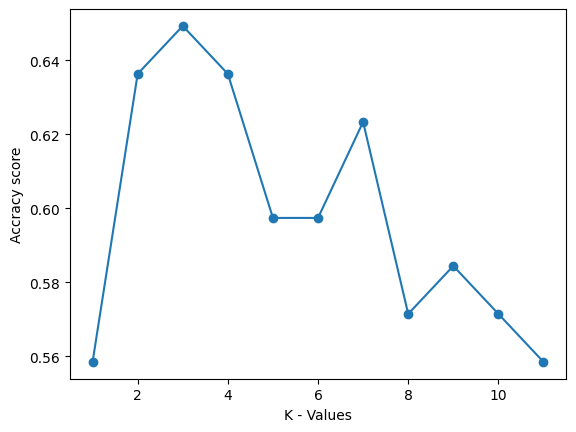

In [ ]:
def knn_accuracy_plot(X_train,X_test,y_train,y_test):
  accuracy_scores=[]
  k = list(range(1,12))
  for i in range(1,12):
    neighT = knn(n_neighbors=i)
    neighT.fit(X_test,y_test)
    accuracy = neighT.score(X_train,y_train)
    accuracy_scores.append(accuracy)

  plt.plot(k,accuracy_scores,'-o')
  plt.xlabel("K - Values")
  plt.ylabel("Accracy score")
  plt.show()


knn_accuracy_plot(X_train,X_test,y_train,y_test)



A9.Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [ ]:

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Train Data:\n", conf_matrix_train)
print("\nConfusion Matrix - Test Data:\n", conf_matrix_test)
print("The report for trainng dat is :\n",classification_report(y_train, y_train_pred))
print("The report for trainng dat is :\n",classification_report(y_test, y_test_pred))

Confusion Matrix - Train Data:
 [[33  5]
 [ 8 31]]

Confusion Matrix - Test Data:
 [[12  5]
 [ 6 10]]
The report for trainng dat is :
               precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.86      0.79      0.83        39

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77

The report for trainng dat is :
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.67      0.62      0.65        16

    accuracy                           0.67        33
   macro avg       0.67      0.67      0.67        33
weighted avg       0.67      0.67      0.67        33

